## Project: Implementing a Key_value database with use of B-Tree data structure

The goal of this guided project is to extend the BTree implementation to implement a key-value store class named KVStore

In [1]:
from btree import BTree

class KVStore(BTree):
    def __init__(self):
        super.__init__(split_threshold = 2)

In [2]:
## adjusting the add method imported from the BTree file

class KVStore(BTree):
    def __init__(self):
        super().__init__(split_threshold = 2)

    def add(self, key, value):
        node = self._find_node(self.root, key)
        
        if node is None:
            super().add(key, value)
        
        else:
            for i, key_num in enumerate(node.keys):
                if key_num == key:
                    node.values[i] = value    

### Testing
Testing the implementation to make sure that:

- The split threshold is correct.
- Entries can be added.
- Values can be retrieved for a given a key.
- If two entries with the same key are added, then the value is updated.

In [3]:
kvstore = KVStore()

# Check the split threshold
assert kvstore.split_threshold == 2

# Add the entries (i, i) for i from 0 to 9
for i in range(10):
    kvstore.add(i, i)

# Check the values
for i in range(10):
    assert kvstore.get_value(i) == i, "Value of i is i"

# Add again with different values
for i in range(10):
    kvstore.add(i, i + 2)

# Check the new values
for i in range(10):
    assert kvstore.get_value(i) == i + 2, "Value of i is i + 2"

### Implementing the Item Getter and Setter
To allow users to use the bracket notation, implementation of the __getitem__() and __setitem__() methods are required.

These methods are already implemented in the BTree file and are named get_value() and add(), respectively. Now to implement them by calling the corresponding method.

In [4]:
class KVStore(BTree):
    def __init__(self):
        super().__init__(split_threshold = 2)

    def add(self, key, value):
        node = self._find_node(self.root, key)
        
        if node is None:
            super().add(key, value)
        
        else:
            for i, key_num in enumerate(node.keys):
                if key_num == key:
                    node.values[i] = value    
    
    def __getitem__(self, key):
        return self.get_value(key)
    
    def __setitem__(self, key, value):
        self.add(key, value)

In [5]:
## Testing getitem and setitem

kv = KVStore()

# Check the split threshold
assert kv.split_threshold == 2, "Split threshold is 2"

# Add the entries (i, i) for i from 0 to 9
for i in range(10):
    kv[i] = i

# Check the values
for i in range(10):
    assert kv[i] == i, "Value of i is i"

# Add again with different values
for i in range(10):
    kv[i] = i + 2

# Check the new values
for i in range(10):
    assert kv[i] == i + 2, "Value of i is i + 2"

### Enhancing the Contains Method
To enable the in operator, wrapping the BTree.contains() method inside a new method named __contains__() is required.

In [6]:
class KVStore(BTree):
    def __init__(self):
        super().__init__(split_threshold = 2)

    def add(self, key, value):
        node = self._find_node(self.root, key)
        
        if node is None:
            super().add(key, value)
        
        else:
            for i, key_num in enumerate(node.keys):
                if key_num == key:
                    node.values[i] = value    
    
    def __getitem__(self, key):
        return self.get_value(key)
    
    def __setitem__(self, key, value):
        self.add(key, value)
        
    def __contains__(self, key):
        return self.contains(key)

In [7]:
## Testing contains

kv = KVStore()
for c in 'abcdefghijklmnopqrstuvwxyz':
    kv[c] = c

for c in 'abcdefghijklmnopqrstuvwxyz':
    assert c in kv, "Character is in the key-value store"
    
print(kv.root.values) # keys are the same
print(kv.root.keys)   # values are the same

['h', 'p']
['h', 'p']


### Implementing Range Queries

In [8]:
class KVStore(BTree):
    
    def __init__(self):
        super().__init__(split_threshold=2)
        
    def add(self, key, value):
        node = self._find_node(self.root, key)
        if node is None:
            super().add(key, value)
        else:
            # Replace the old value by the new
            for i, node_key in enumerate(node.keys):
                if node_key == key:
                    node.values[i] = value
                    
    def __setitem__(self, key, value):
        self.add(key, value)
        
    def __getitem__(self, key):
        return self.get_value(key)

    def __contains__(self, key):
        return self.contains(key)
    
    def _range_query(self, range_start, range_end, current_node, min_key, max_key):
        if not self._range_intersects(range_start, range_end, min_key, max_key):
            return []
        results = []
        for i, key in enumerate(current_node.keys):
            if range_start <= key and key <= range_end:
                results.append(current_node.values[i])
        if not current_node.is_leaf():
            for i, child in enumerate(current_node.children):
                new_min_key = current_node.keys[i - 1] if i > 0 else min_key
                new_max_key = current_node.keys[i] if i < len(current_node) else max_key
                results += self._range_query(range_start, range_end, child, new_min_key, new_max_key)
        return results 

    def range_query(self, range_start, range_end):
        return self._range_query(range_start, range_end, self.root, float('-inf'), float('inf'))
    
    def _range_intersects(self, range_start, range_end, node_min, node_max):
        if not node_min is None and node_min > range_end:
            return False
        if not node_max is None and node_max < range_start:
            return False
        return True

In [9]:
## Creating dictionary for testing

class DictKVStore(dict):
    
    def range_query(self, range_start, range_end):
        result = []
        for key in self.keys():
            if range_start <= key and key <= range_end:
                result.append(self[key])
        return result

## Testing range query of dictioary class
## Comparison
dict_kv = DictKVStore()
our_kv = KVStore()

for i in range(10):
    dict_kv[i] = i
    our_kv[i] = i

for range_start, range_end in [(2, 7), (5, 9), (2, 4), (6, 8)]:
    dict_res = sorted(dict_kv.range_query(range_start, range_end))
    our_res = sorted(our_kv.range_query(range_start, range_end))
    assert dict_res == our_res, "Both data structures return the same range query result."

### Tests for both our BTree and Dictionary implementations

In [10]:
import random
random.seed(0)

inserts = 10
contains = 10
range_queries = 10

dict_kv = DictKVStore()

kv = KVStore()

print("Testing Insertion")
for _ in range(inserts):
    key = random.randint(0, 100)
    value = random.randint(0, 1000000)
    dict_kv[key] = value
    kv[key] = value
    
print("Length test")
assert len(dict_kv) == len(kv), "Length should be {} but is {}.".format(len(dict_kv), len(kv))
    

print("Values test")
for key in dict_kv:
    assert dict_kv[key] == kv[key], "Expected value {} but found value {}.".format(key, dict_kv[key], kv[key])

    
print("Operator testing")
for i in range(contains):
    key = random.randint(0, 1000)
    assert (key in dict_kv) == (key in kv), "Contains method did not return the correct value for key {}.".format(key)
    
print("Testing Range Queries")
for _ in range(range_queries):
    range_start = random.randint(0, 100)
    range_end = random.randint(range_start, 100)
    dict_results = dict_kv.range_query(range_start, range_end)
    kv_results = kv.range_query(range_start, range_end)
    assert len(dict_results) == len(kv_results), "Wrong number of reuslt in range query [{}, {}]. Should be {} but was {}.".format(range_start, range_end, len(dict_result), len(kv_result))
    dict_results.sort()
    kv_results.sort()
    assert dict_results == kv_results, "Wrong number of reuslt in range query [{}, {}]. Should be {} but was {}.".format(range_start, range_end, len(dict_result), len(kv_result))

Testing Insertion
Length test
Values test
Operator testing
Testing Range Queries


### Speed Tests
To perform the speed tests, create an empty data structure of each type.

Then load all entries from the entries.csv file.

After that, loop over each query in the queries.csv file. For each query, measure its execution time on both data structure. Then compute the execution time ratio between the dictionary solution and BTree solution.

In the end, plot the result.

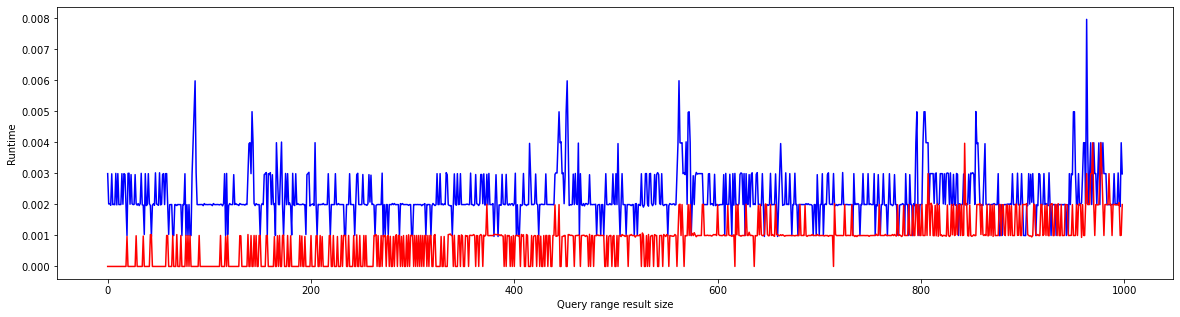

In [11]:
import time
import csv
import matplotlib.pyplot as plt

dict_kv = DictKVStore()
our_kv = KVStore()

# Load the entries
with open('entries.csv', 'r') as f:
    rows = list(csv.reader(f))[1:]
    for row in rows:
        key = int(row[0])
        value = int(row[1])
        dict_kv[key] = value
        our_kv[key] = value

# Measure query times
time_d = []
time_btree = []
time_ratios = []

with open('queries.csv', 'r') as f:
    rows = list(csv.reader(f))[1:]
    for row in rows:
        range_start = int(row[0])
        range_end = int(row[1])
        
        start = time.time()
        dict_kv.range_query(range_start, range_end)
        end = time.time()
        time_dict = end - start
        time_d.append(time_dict)

        start = time.time()
        our_kv.range_query(range_start, range_end)
        end = time.time()
        time_kv = end - start
        time_btree.append(time_kv)
        
        # time_ratios.append(time_dict / time_kv)

        # Ratios could not be used since zero division error 
# Plot results
plt.rcParams["figure.figsize"] = (20,5)
plt.plot(time_d, color = "blue")
plt.plot(time_btree, color = "red")
plt.xlabel('Query range result size')
plt.ylabel('Runtime')
plt.show()

### Conclusion
For the 50,000 entries in the csv file, we get a significant performance boost initially.

The performance boost decreases as the size of the of query increases. This is expected, since when more results are returned then more of the entries have to be iterated through for the btree data-structure.